In [7]:
from games.blotto import Blotto
from agents.fictitiousplay import FictitiousPlay
from agents.random_agent import RandomAgent
import matplotlib.pyplot as plt
import numpy as np
from agents.regretmatching import RegretMatching

In [8]:
g = Blotto(S=10, N=3)
g.reset()

In [14]:
def play(agents_config, steps):
    g.reset()
    
    rewards = {
        g.agents[0]: [],
        g.agents[1]: []
    }

    moves = {
        g.agents[0]: [],
        g.agents[1]: []
    }

    for i in range(steps):
        actions = dict(map(lambda agent: (agent, agents_config[agent][1].action()), g.agents))
        g.step(actions)

        for agent_id in g.agents:
            r = g.reward(agent_id)
            rewards[agent_id].append(r)
            moves[agent_id].append(actions[agent_id])

        for _, ag in agents_config.values():
            ag.step_update()


    _, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

    # Cumulative average result
    agent1_avg = np.cumsum(rewards[g.agents[0]]) / np.arange(1, len(rewards[g.agents[0]]) + 1)
    agent2_avg = np.cumsum(rewards[g.agents[1]]) / np.arange(1, len(rewards[g.agents[1]]) + 1)
    axes[0].plot(agent1_avg, label=agents_config[g.agents[0]][0])
    axes[0].plot(agent2_avg, label=agents_config[g.agents[1]][0])
    axes[0].set_title('Cumulative average over time')
    axes[0].legend()

    # Agent 1 actions
    axes[1].set_xlabel('timesteps')
    axes[1].set_ylabel('actions')
    axes[1].plot(moves[g.agents[0]])
    axes[1].set_yticks(np.arange(len(g._moves)), g._moves)
    axes[1].set_title(f'{agents_config[g.agents[0]][0]} actions over time')

    # Agent 2 actions
    axes[2].set_xlabel('timesteps')
    axes[2].set_ylabel('actions')
    axes[2].plot(moves[g.agents[1]])
    axes[2].set_yticks(np.arange(len(g._moves)), g._moves)
    axes[2].set_title(f'{agents_config[g.agents[1]][0]} actions over time')

    for ax in axes:
        ax.grid(True)

    plt.tight_layout()
    plt.show()


### FP vs FP

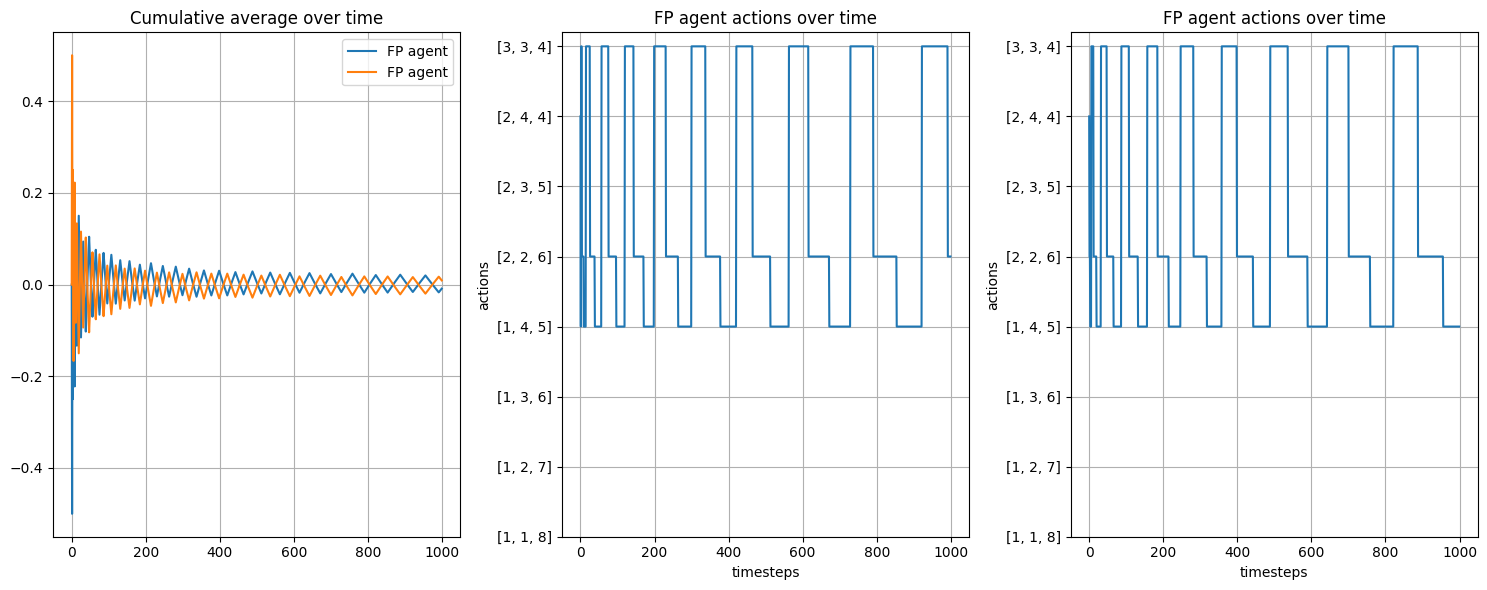

[0.         0.         0.         0.33033033 0.31331331 0.
 0.001001   0.35535536]
[0.         0.         0.         0.33833834 0.34134134 0.
 0.001001   0.31931932]


In [17]:
fp_vs_fp = {
    g.agents[0]: ('FP agent', FictitiousPlay(game=g, agent=g.agents[0])),
    g.agents[1]: ('FP agent', FictitiousPlay(game=g, agent=g.agents[1])),
}

play(fp_vs_fp, 1000)
print(fp_vs_fp[g.agents[0]][1].policy())
print(fp_vs_fp[g.agents[1]][1].policy())

### FP vs RM

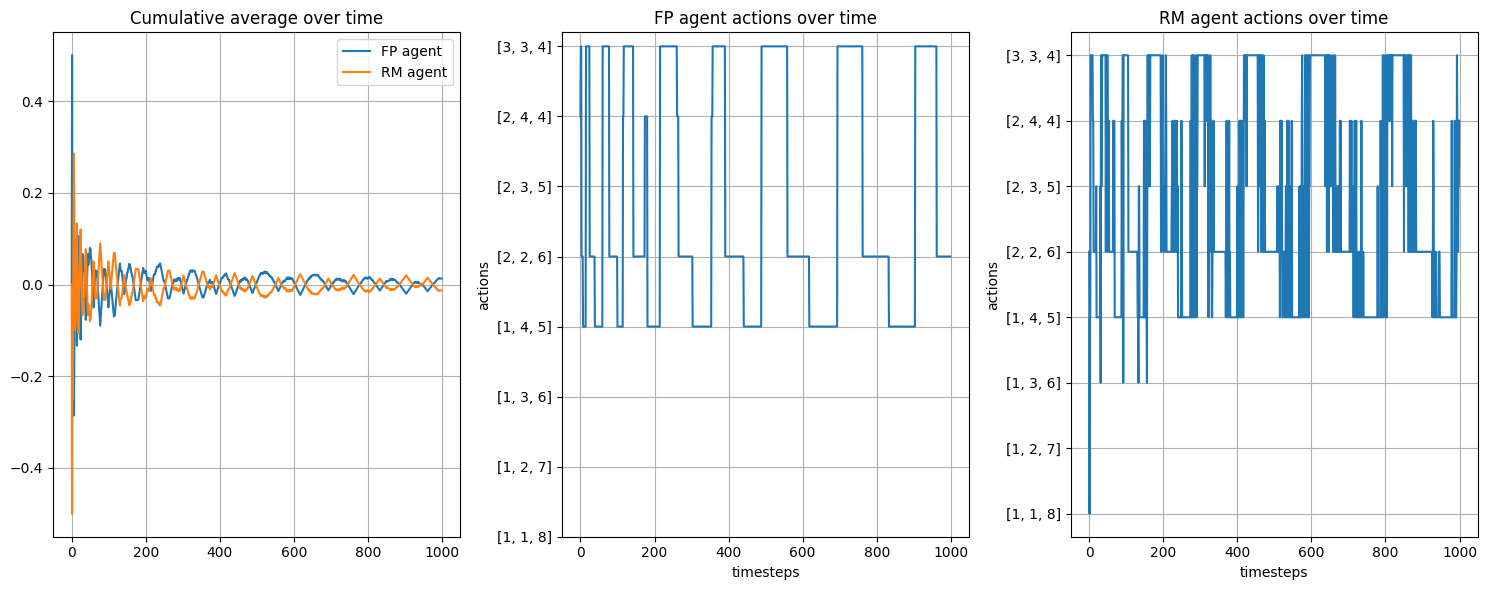

[0.         0.         0.         0.32432432 0.32632633 0.
 0.01701702 0.33233233]
[2.50000000e-04 2.50000000e-04 4.08106762e-03 3.03949127e-01
 2.86053891e-01 7.75235665e-02 7.75235665e-02 2.50368782e-01]


In [30]:
fp_vs_rm = {
    g.agents[0]: ('FP agent', FictitiousPlay(game=g, agent=g.agents[0])),
    g.agents[1]: ('RM agent', RegretMatching(game=g, agent=g.agents[1])),
}

play(fp_vs_rm, 1000)

print(fp_vs_rm[g.agents[0]][1].policy())
print(fp_vs_rm[g.agents[1]][1].policy())

### FP vs Random

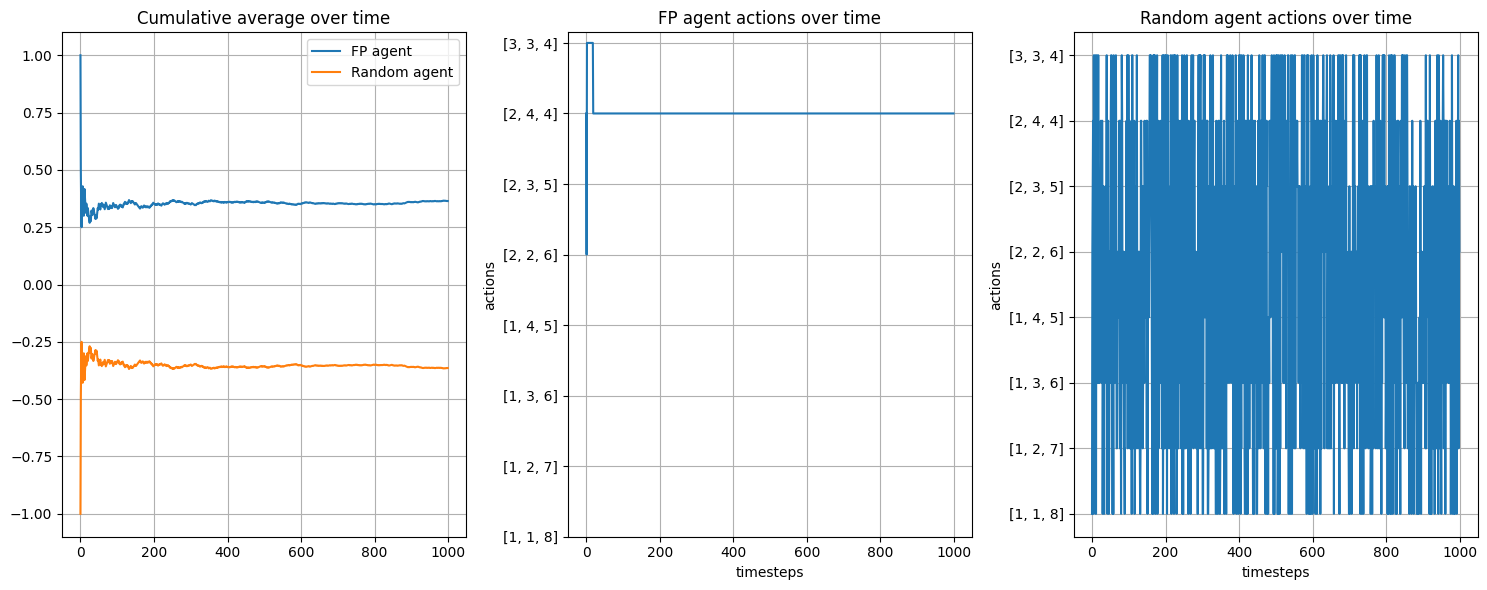

[0.         0.         0.         0.         0.001001   0.
 0.98198198 0.01701702]
[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


In [34]:
fp_vs_random = {
    g.agents[0]: ('FP agent', FictitiousPlay(game=g, agent=g.agents[0])),
    g.agents[1]: ('Random agent', RandomAgent(game=g, agent=g.agents[1])),
}

play(fp_vs_random, 1000)

print(fp_vs_random[g.agents[0]][1].policy())
print(fp_vs_random[g.agents[1]][1].policy())

### RM vs RM

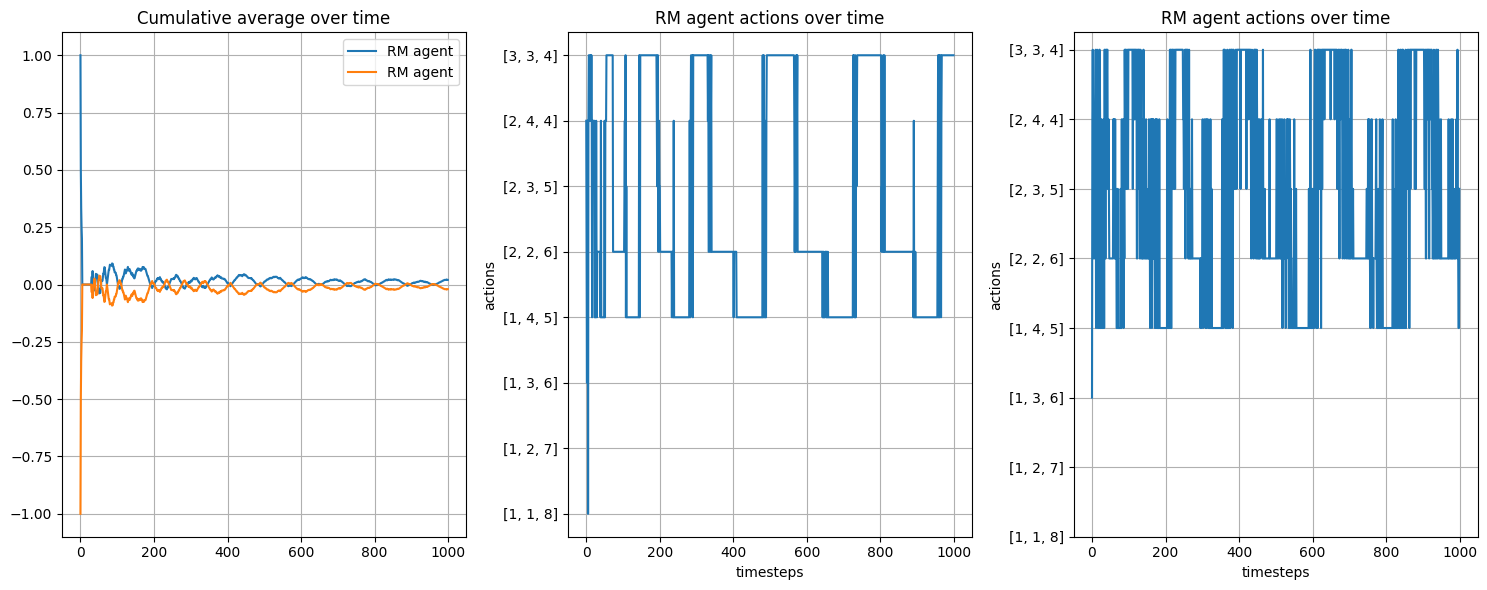

[0.00075    0.00075    0.00075    0.32643336 0.3094235  0.01513887
 0.03453194 0.31222234]
[1.25000000e-04 1.25000000e-04 1.25000000e-04 2.22587715e-01
 2.71891119e-01 1.21855409e-01 1.43011332e-01 2.40279425e-01]


In [39]:
rm_vs_rm = {
    g.agents[0]: ('RM agent', RegretMatching(game=g, agent=g.agents[0])),
    g.agents[1]: ('RM agent', RegretMatching(game=g, agent=g.agents[1])),
}

play(rm_vs_rm, 1000)

print(rm_vs_rm[g.agents[0]][1].policy())
print(rm_vs_rm[g.agents[1]][1].policy())

### RM vs Random

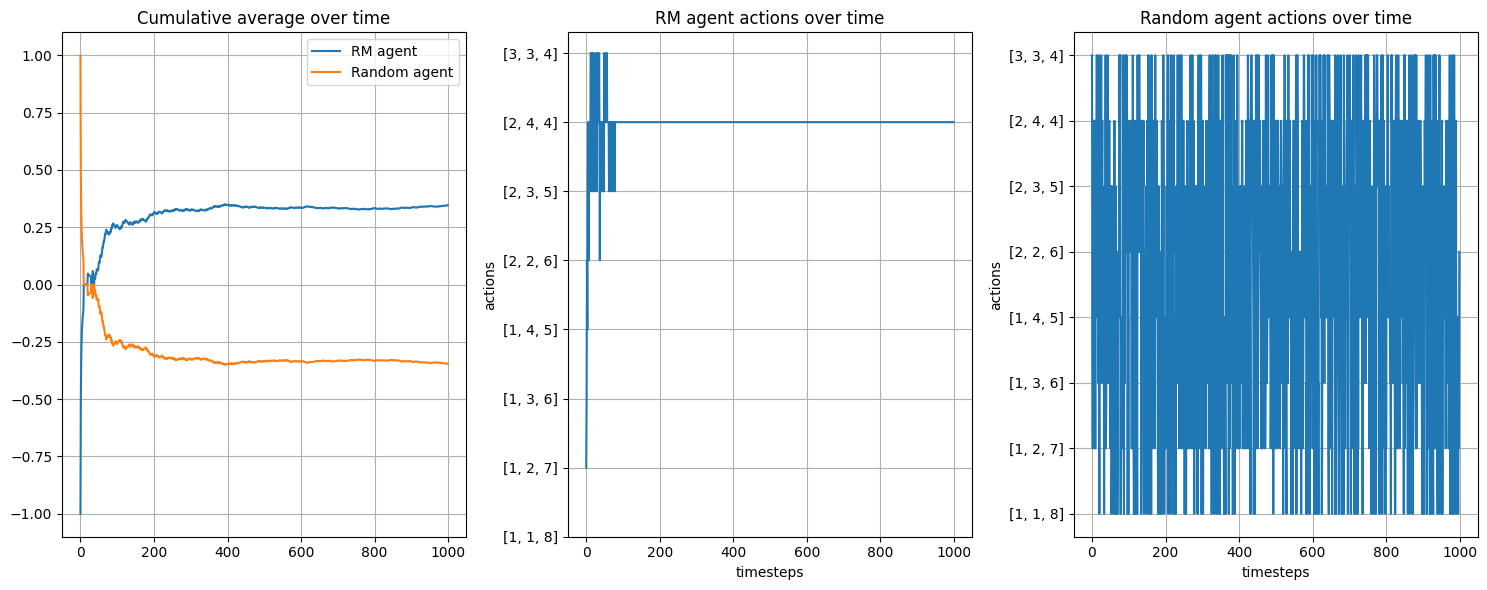

[1.25000000e-04 1.25000000e-04 5.69444444e-04 1.82070707e-03
 3.75620558e-03 1.66511512e-02 9.60644627e-01 1.63078649e-02]
[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


In [24]:
rm_vs_random = {
    g.agents[0]: ('RM agent', RegretMatching(game=g, agent=g.agents[0])),
    g.agents[1]: ('Random agent', RandomAgent(game=g, agent=g.agents[1])),
}

play(rm_vs_random, 1000)

print(rm_vs_random[g.agents[0]][1].policy())
print(rm_vs_random[g.agents[1]][1].policy())